In [10]:
import pandas as pd
import matplotlib.pyplot as plt
dataset= pd.read_csv("creditcard.csv")

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Analysis

In [6]:
dataset.shape


(284807, 31)

In [8]:
# Split data between Fraud (anomalies) and normal
anomalies = dataset[dataset.Class == 1]
normal = dataset[dataset.Class == 0]
print(f"Anomalies: {anomalies.shape}")
print(f"Normal: {normal.shape}")

Anomalies: (492, 31)
Normal: (284315, 31)


Text(0, 0.5, 'Counts')

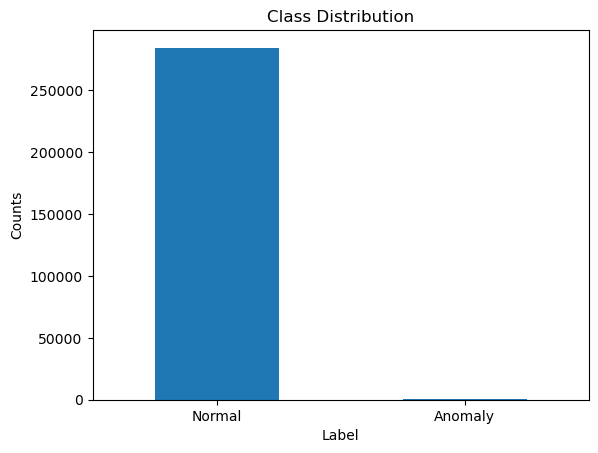

In [11]:


class_counts = pd.value_counts(dataset['Class'], sort = True) 
class_counts.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Anomaly"]) 
plt.xlabel("Label")
plt.ylabel("Counts")

In [14]:
#describe one column of the data:
anomalies.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
import numpy as np
# plotting functions:
def plot_histogram(df, bins, column, log_scale=False): 
    bins = 100
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
    fig.suptitle(f'Counts of {column} by Class')
    ax1.hist(anomalies[column], bins = bins, color="red")
    ax1.set_title('Anomaly')
    ax2.hist(normal[column], bins = bins, color="orange")
    ax2.set_title('Normal')
    plt.xlabel(f'{column}') 
    plt.ylabel('Count')
    if log_scale:
        plt.yscale('log')
    plt.xlim((np.min(df[column]), np.max(df[column])))
    plt.show()

In [17]:
def plot_scatter(df, x_col, y_col, sharey = False): 
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=sharey)
    fig.suptitle(f'{y_col} over {x_col} by Class')
    ax1.scatter(anomalies[x_col], anomalies[y_col], color='red') 
    ax1.set_title('Anomaly')
    ax2.scatter(normal[x_col], normal[y_col], color='orange')
    ax2.set_title('Normal')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

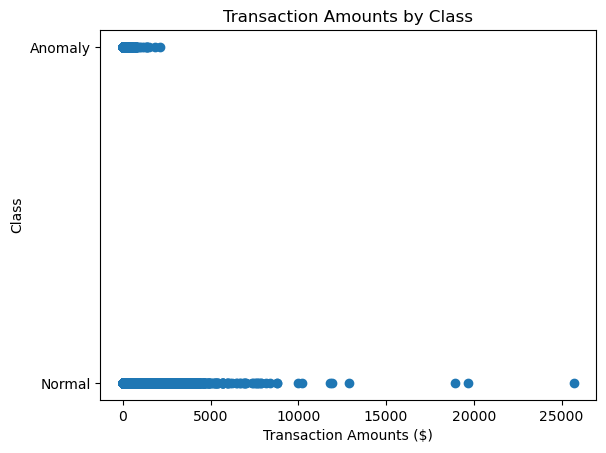

In [18]:
plt.scatter(dataset.Amount, dataset.Class) 
plt.title("Transaction Amounts by Class") 
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"]) 
plt.xlabel("Transaction Amounts ($)") 
plt.show()

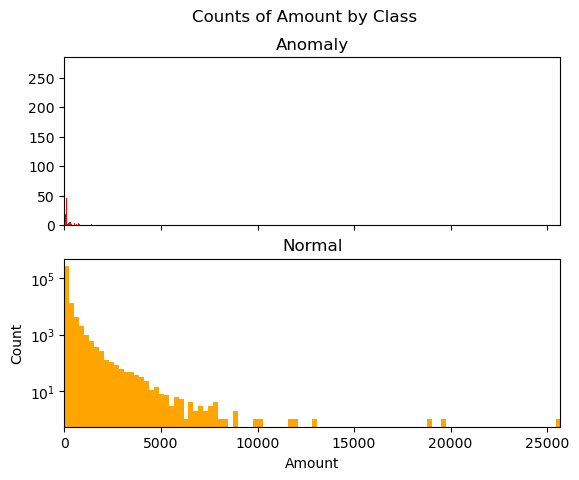

In [20]:
bins = 100
plot_histogram(dataset, bins, "Amount", log_scale=True)

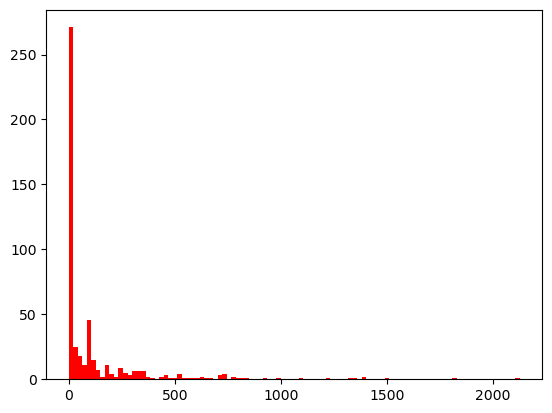

In [21]:
plt.hist(anomalies.Amount, bins = bins, color="red")
plt.show()

This means that the majority of anomalous transactions actually have quite low transaction amounts.

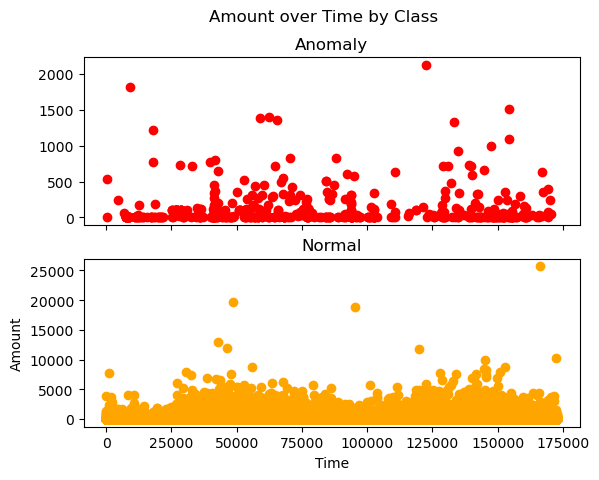

In [22]:
plot_scatter(dataset, "Time", "Amount")

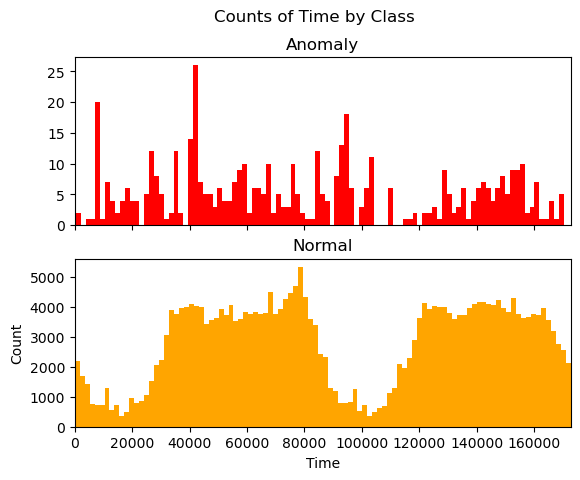

In [24]:
plot_histogram(dataset, bins,"Time")

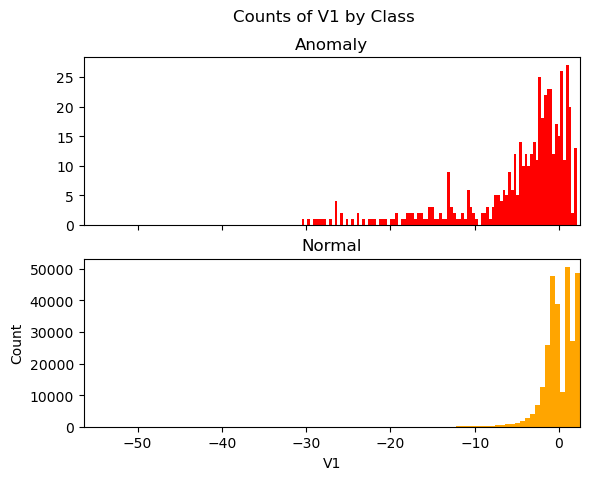

In [25]:
plot_histogram(dataset, bins, "V1")

V1 Counts


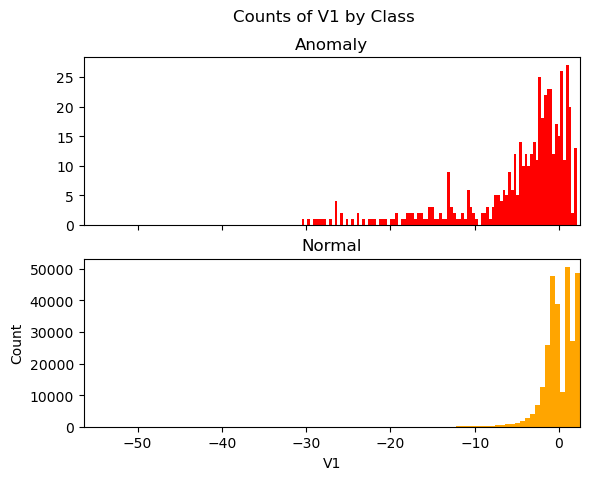

V2 Counts


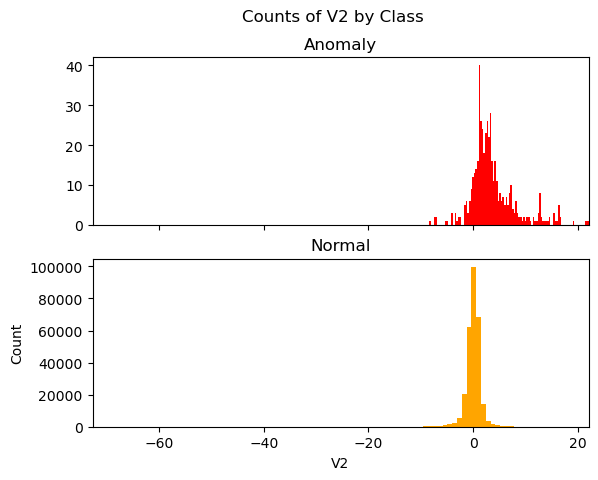

V3 Counts


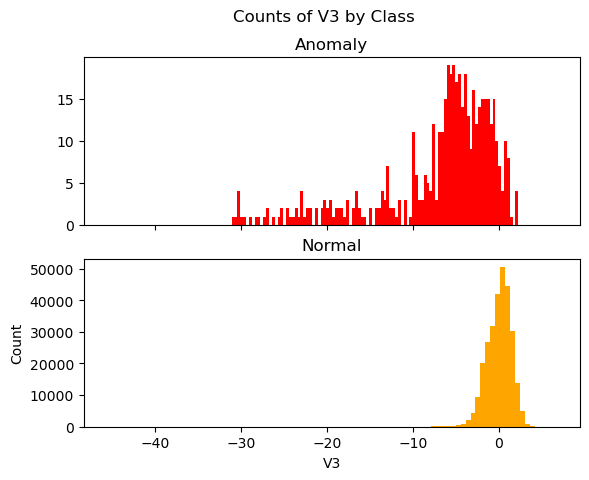

V4 Counts


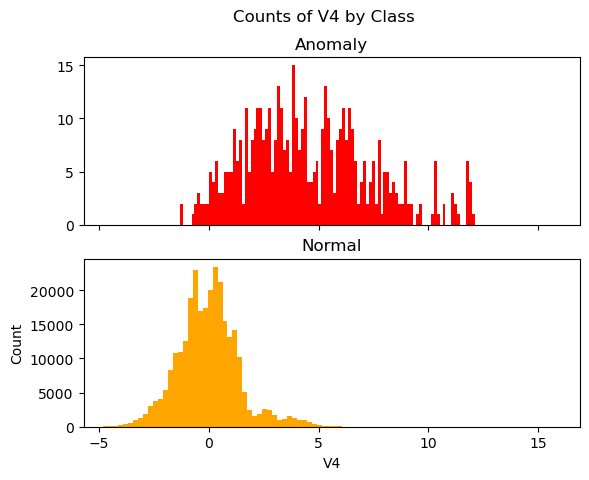

V5 Counts


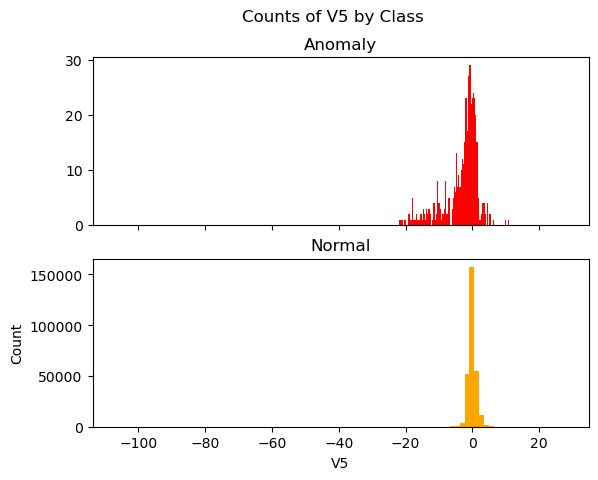

V6 Counts


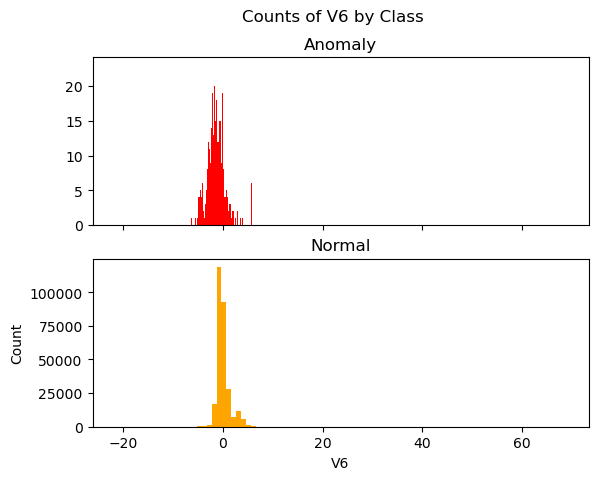

V7 Counts


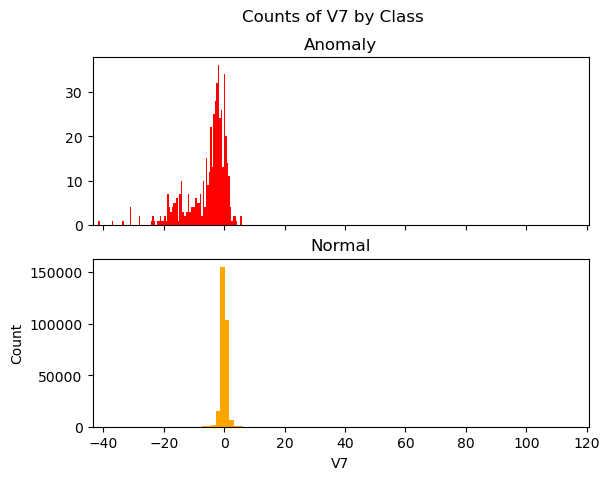

V8 Counts


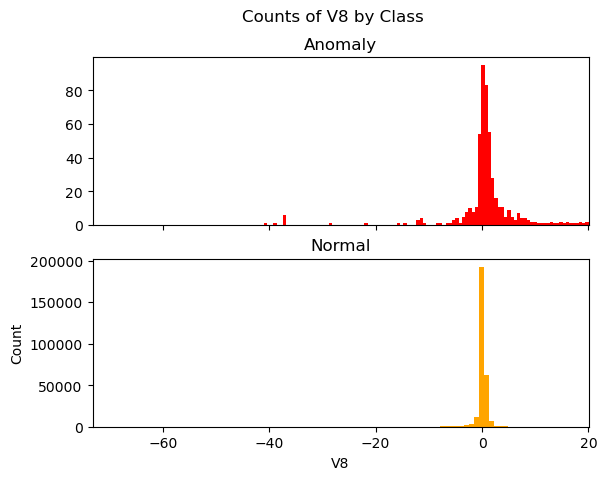

V9 Counts


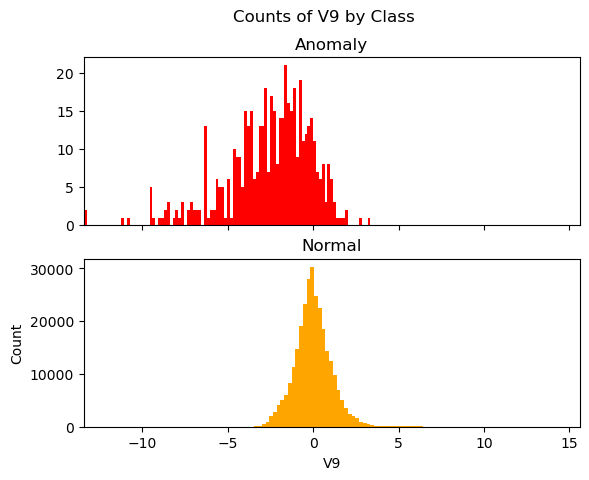

V10 Counts


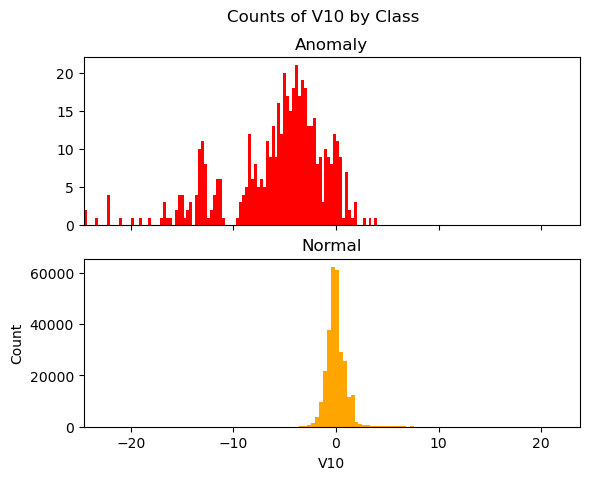

V11 Counts


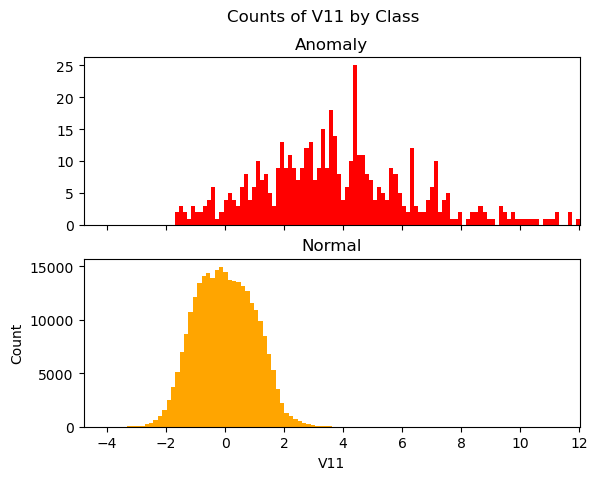

V12 Counts


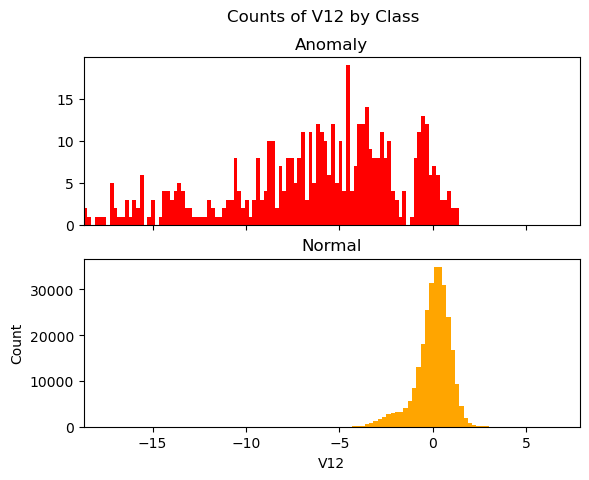

V13 Counts


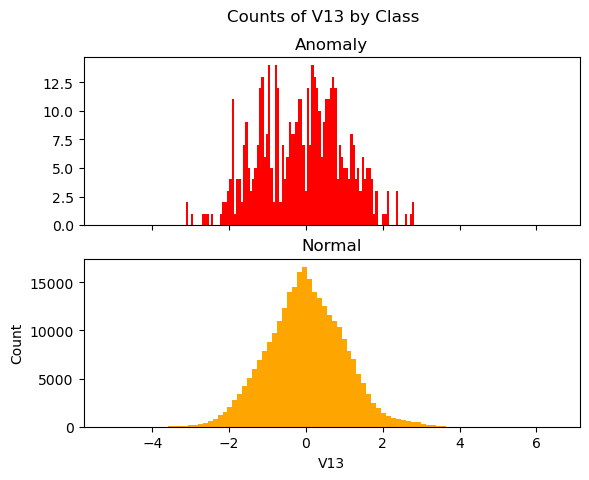

V14 Counts


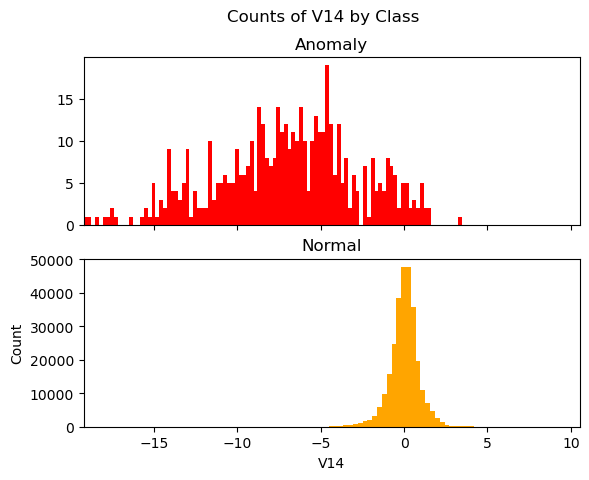

V15 Counts


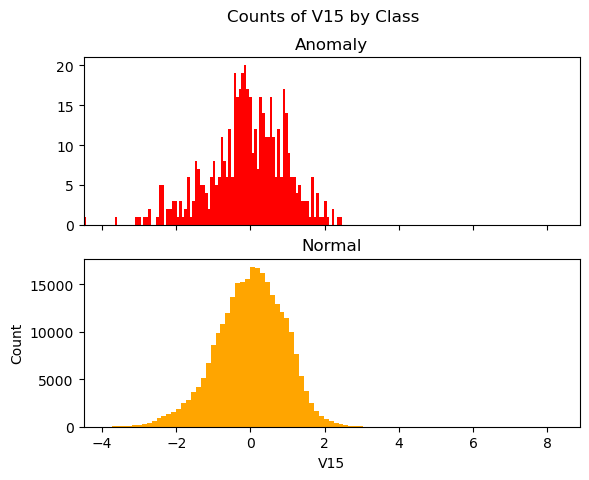

V16 Counts


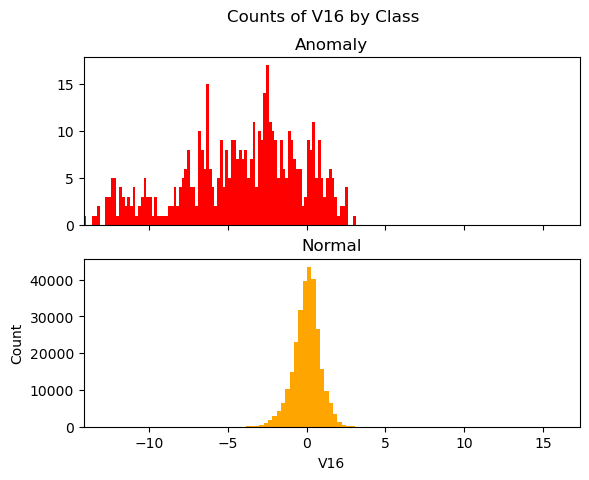

V17 Counts


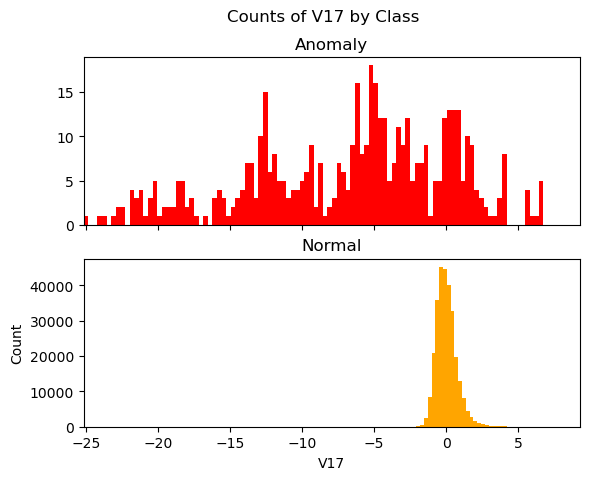

V18 Counts


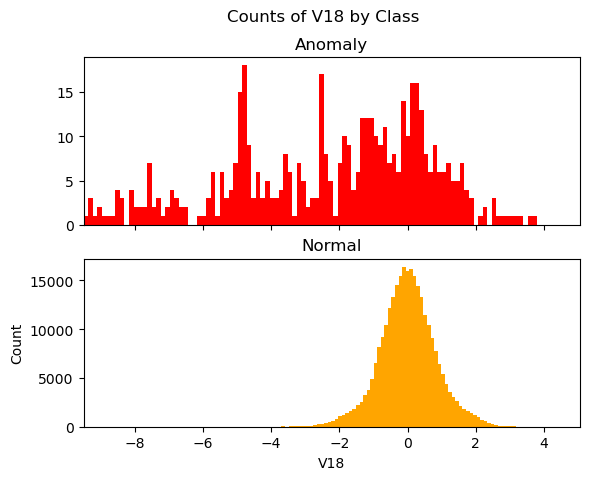

V19 Counts


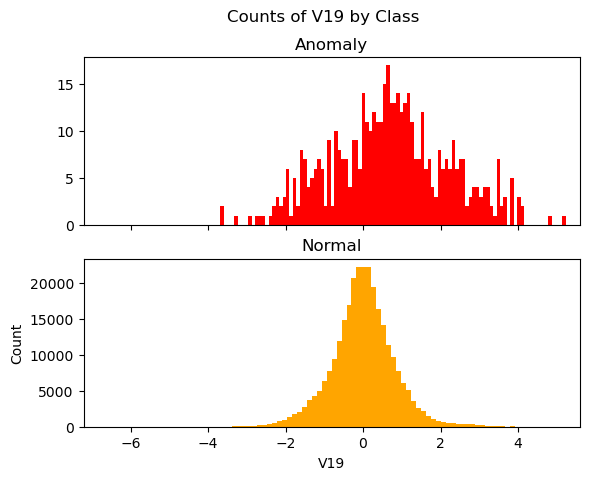

V20 Counts


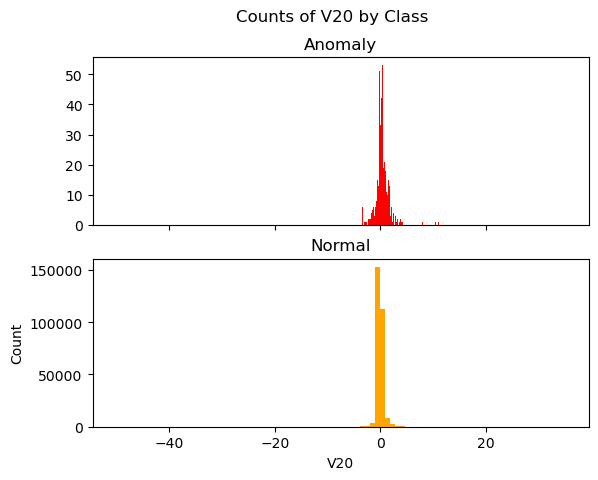

V21 Counts


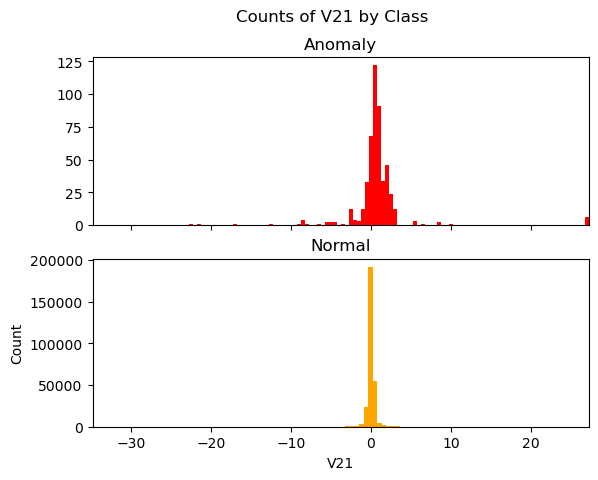

V22 Counts


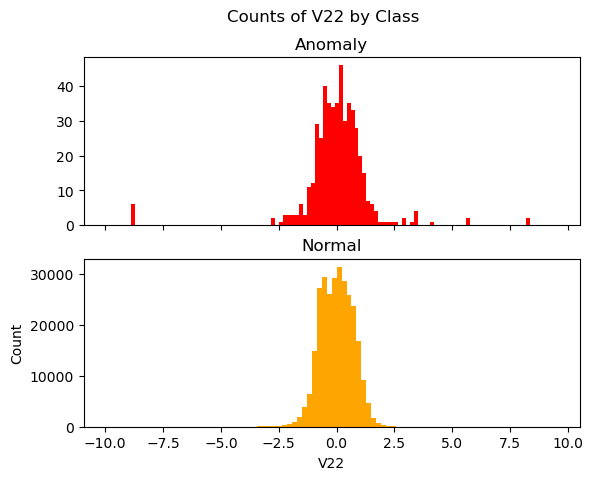

V23 Counts


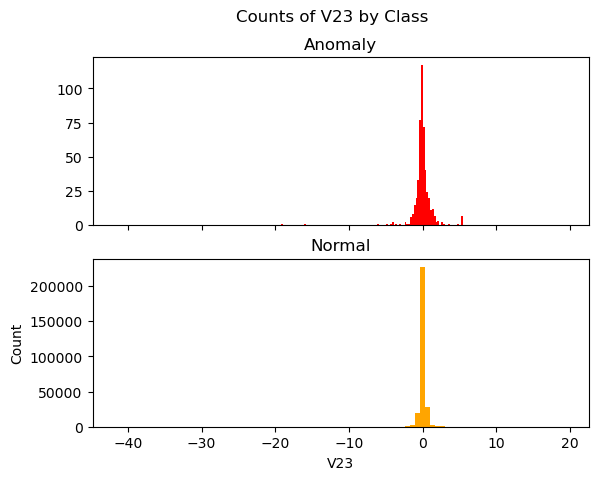

V24 Counts


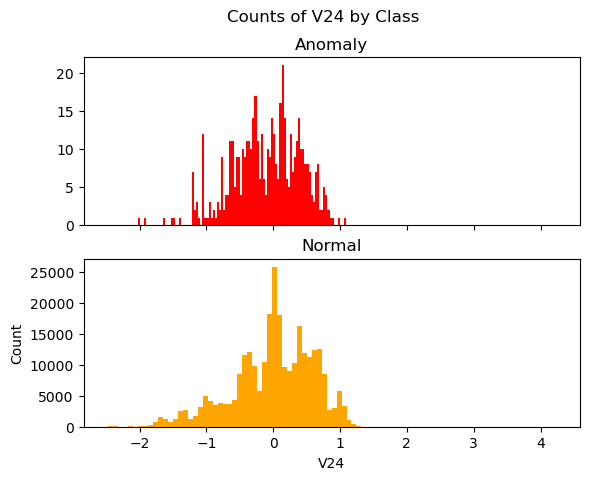

V25 Counts


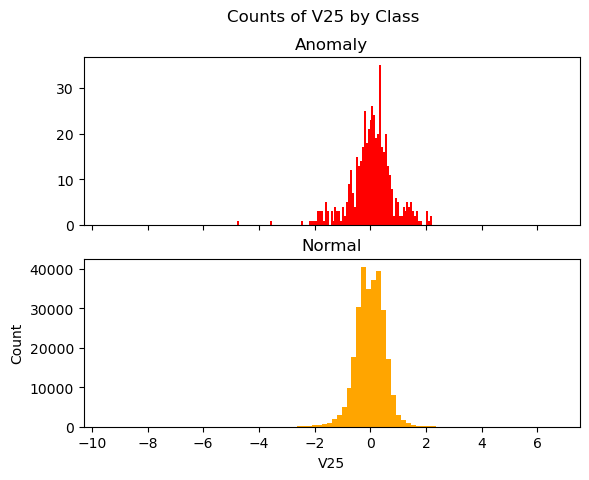

V26 Counts


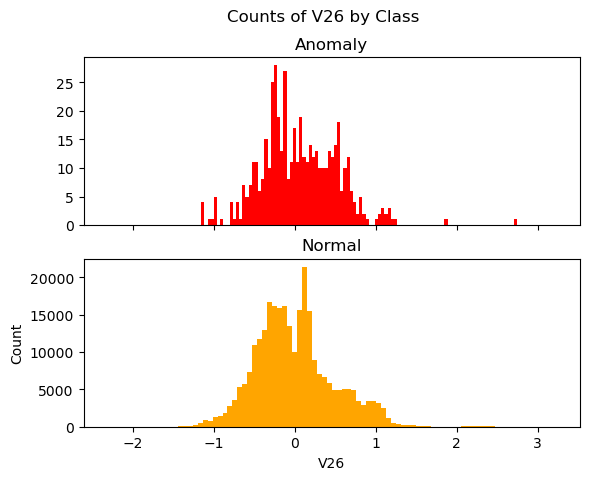

V27 Counts


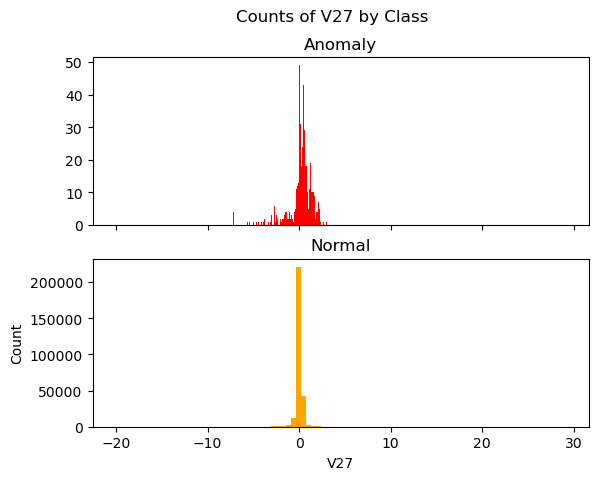

V28 Counts


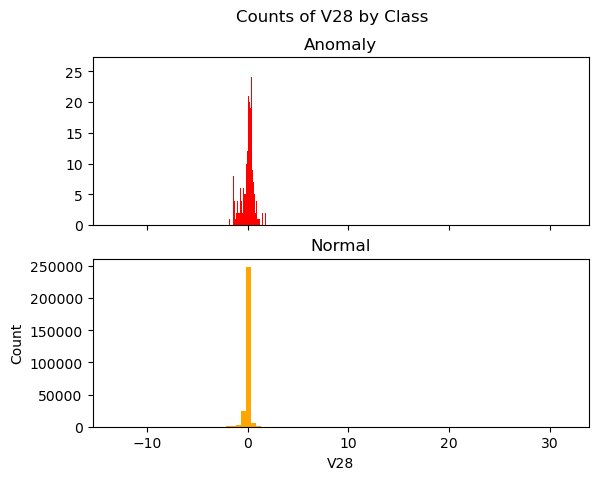

In [26]:
for f in range(1, 29):
    print(f'V{f} Counts') 
    plot_histogram(dataset, bins, f'V{f}')

one can see that for V12 and V17, there is a clear difference in deviations between normal and fraudulent data. This indicates that these columns are more likely to help the model learn how to differentiate between normal and fraudulent transactions than some of the other columns that don’t show such a deviance